<a href="https://colab.research.google.com/github/mssnowy/c112/blob/main/p112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

**Image Dataset Directory Structur**e:

**Note: The directory and sub-directory names shown here are only for explanation purposes which might differ from the code.**

Suppose if we have a master directory(folder) of the Images then we can subdivide it into “Training”, “Validation” & “Testing” images sub-directories(sub-folder). 

And then the “Training” directories contain sub-directories(sub-folders) called “Infected” and “Uninfected” which contain appropriate images in the respective sub-directories.

Similarly, the “Validation'' & “Testing” directory also contains sub-directories(sub-folders) called “Infected” and “Uninfected” which contain appropriate images in the respective sub-directories.


**Training**: Images in this directory will be used for the training of the data.

**Validation**: Images in this directory will be used to validate the model training. The validation dataset allows us to see how well the data generalises the classification.

**Testing**: Images in this directory will be used to test how well the model is trained.
<img src="https://s3-whjr-curriculum-uploads.whjr.online/2467514a-e93f-4a0f-8e20-b3893dfa9144.jpeg" width= 600>



In [1]:
!git clone https://github.com/procodingclass/PRO-M3-Hurricane-Damage-Dataset

Cloning into 'PRO-M3-Hurricane-Damage-Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 2.07 MiB | 23.29 MiB/s, done.


## Visualise the Data

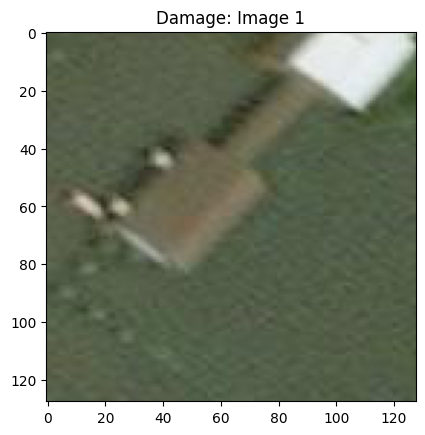

In [2]:
from matplotlib import pyplot
from matplotlib.image import imread

training_infected_image = "/content/PRO-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg"

# load image pixels
image = imread(training_infected_image)

pyplot.title("Damage: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()


## Image Preprocessing

1. Convert each image to an array
2. Map each image labels
3. Augment the each image

### Image Preprocessing: Mapping each image with labels

<center><b>Mapping Each Image With Labels</b><br><img src="https://s3-whjr-curriculum-uploads.whjr.online/1bdade80-2a32-4fc2-8902-f18067803dba.jpeg" width= 1000>

### Image Preprocessing: Data Augmentation

A few Data Augemtation Techniques:

*   Image Rotation
*   Image Height & Width Shift
*   Image Horizontal & Vertical Flipping
*   Image Resizing
*   Image Zooming


<img src="https://s3-whjr-curriculum-uploads.whjr.online/5403e9b1-a339-405d-98b3-36826ec3f04a.gif" width= 400>











## Image Preprocessing

In [3]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator(rotation_range=90,fill_mode='nearest')
training_image_directory = '/content/PRO-M3-Hurricane-Damage-Dataset'
training_augmented_images = training_data_generator.flow_from_directory(training_image_directory,target_size=(180,180))

Found 799 images belonging to 4 classes.


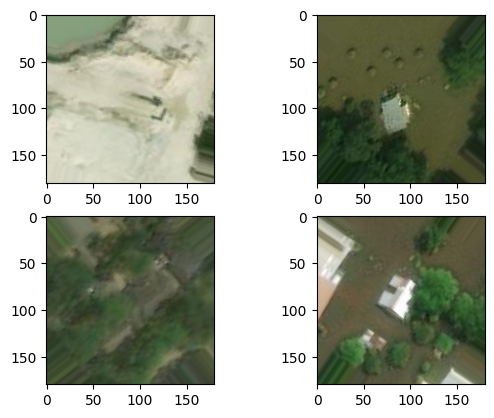

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread
for i in range(4):
  pyplot.subplot(2,2,i+1)
  batch = training_augmented_images.next()
  image = batch[0][0].astype('uint8')
  pyplot.imshow(image)

pyplot.show()

In [5]:
training_augmented_images.class_indices

{'.git': 0, 'test': 1, 'train': 2, 'validate': 3}

In [6]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0